In [1]:

import matplotlib as plt
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.patches as patches
from descartes.patch import PolygonPatch
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure

import networkx as nx
import pygraphviz
import pydot
from networkx.drawing.nx_agraph import graphviz_layout

import random
import pandas as pd
import napari

import random
from shapely.geometry import Point,MultiPoint,MultiPolygon,Polygon,box,LineString
from shapely import affinity
import re

from shapely import geometry
import pickle
import time

import ipywidgets as widgets
import ipywidgets.widgets.interaction
from ipywidgets import *
import warnings
warnings.simplefilter('ignore', np.RankWarning)

from copy import deepcopy
import magicgui as mg
from magicgui import magicgui


import skimage.measure as measure
from dask_image.imread import imread
import src

%load_ext autoreload


In [2]:
path_to_uj_strix="/home/esb/Projects/uJ/local/current/uJ_src_SingleChan/python/"
path_to_uj_trillion='/home/charly/Lab/Projects/uJ/local/current/uJ_src_SingleChan/python/'
path_to_uj_trillion_online='/home/charly/Lab/Projects/uJ/uJ_src_online/python/'
path_to_uj=path_to_uj_trillion_online
#path_to_uj=path_to_uj_trillion

sys.path.insert(0, path_to_uj)


In [3]:
%autoreload 2
from readroi import *
from DataManagers import *
from TrackingFunctions import *
from PlottingFunctions import *
from AnalysisFunctions import *
from CorrectorFunctions import *

Importing readroi
DataStructs...loaded!
DataManagers...loaded!
TrackingFunctions... 1loaded!
PlottingFunctions... loaded!
Analysis Functions loaded
CorrectorFunctions... loaded!


In [32]:

uj_data_path_trillion="/home/charly/Lab/Projects/uJ/uJ_data/"
uj_data_path_trillion_online="/home/charly/Lab/Projects/uJ/uJ_data_online/"
uj_data_path=uj_data_path_trillion
#uj_data_path=uj_data_path_trillion_online

expeLabelMG="MGGT-AMP-Pulse"

rootDirMG=uj_data_path+"MGGT-AMP-Pulse/20190828_Bruno_MGGT_quimiostato/"

full_trap_listMG="xy01,xy04,xy05,xy06,xy07,xy09,xy12,xy13".split(",")




print(rootDirMG)


channels=["DIC","GFP","DsRed"]
channels_color=["gray","green","red"]
vis=[False,True,True]
vis=[False,False,False]
seg_chan=channels[1]



frame2min=10

figxlim=640
figylim=512
flims=(figxlim,figylim)


frame_experiment_startMG=10;
frame_experiment_endMG=34
frame_signal_startMG=16
frame_signal_endMG=20
frame_norm_startMG=10
frame_norm_endMG=15                  ### trick
frame_analysis_endMG=34

n_framesMG=frame_experiment_endMG-frame_experiment_startMG+1

t_experiment_startMG=0
t_signal_startMG=(frame_signal_startMG-frame_experiment_startMG)*frame2min  
t_signal_endMG=(frame_signal_endMG-frame_experiment_startMG)*frame2min
t_experiment_endMG=(frame_experiment_endMG-frame_experiment_startMG)*frame2min

framesMG=range(int(frame_experiment_startMG),int(frame_experiment_endMG+1))
frames_listMG=[x for x in framesMG]
timesMG=[(this_frame-frame_experiment_startMG)*frame2min for this_frame in framesMG]
times_hourMG=[(this_frame-frame_experiment_startMG)*frame2min/60 for this_frame in framesMG]

data_typeMG="normData"


dirNameDataLineagesMG=rootDirMG+'data/lineages/'

dirNameDataNapariLabelsMG=rootDirMG+'data_napari_labels/'

dirNameDataCellsTrackedCorrectedMG=rootDirMG+'data_cells_tracked_corrected/'

    
dirNameDataLineagesCorrectedMG=rootDirMG+'data/lineages_corrected/'

#Prepare file system

trap_masks_pathMG=[]
trap_tif_pathMG=[]
for pos in full_trap_listMG:
    tif_path=rootDirMG+"data_raw/"+pos+"/"
    trap_tif_pathMG.append(tif_path)
    masks_path=rootDirMG+"data_masks/"+pos+"/MERGE/"  #<----------------- this is special to this experiment
    trap_masks_pathMG.append(masks_path)
    


expeLabelpBGT="pBGT-AMP-Pulse"

rootDirpBGT=uj_data_path+"pBGT-AMP-Pulse/20190325_Bruno_pBGT_quimiostato/"

full_trap_listpBGT="xy01,xy02,xy03,xy11,xy12,xy13,xy14,xy20,xy21,xy22,xy23,xy25,xy26,xy27,xy28,xy29,xy30,xy33,xy34,xy35,xy36,xy37,xy39,xy40,xy41,xy42,xy43,xy44,xy45,xy46,xy47".split(",")



print(rootDirpBGT)

frame_experiment_startpBGT=20;
frame_experiment_endpBGT=44
frame_signal_startpBGT=26
frame_signal_endpBGT=34
frame_norm_startpBGT=20
frame_norm_endpBGT=25
frame_analysis_endpBGT=44

n_framespBGT=frame_experiment_endpBGT-frame_experiment_startpBGT+1

t_experiment_startpBGT=0
t_signal_startpBGT=(frame_signal_startpBGT-frame_experiment_startpBGT)*frame2min  
t_signal_endpBGT=(frame_signal_endpBGT-frame_experiment_startpBGT)*frame2min
t_experiment_endpBGT=(frame_experiment_endpBGT-frame_experiment_startpBGT)*frame2min

framespBGT=range(int(frame_experiment_startpBGT),int(frame_experiment_endpBGT+1))
frames_listpBGT=[x for x in framespBGT]
timespBGT=[(this_frame-frame_experiment_startpBGT)*frame2min for this_frame in framespBGT]
times_hourpBGT=[(this_frame-frame_experiment_startpBGT)*frame2min/60 for this_frame in framespBGT]

data_typepBGT="normData"


dirNameDataLineagespBGT=rootDirpBGT+'data/lineages/'

dirNameDataNapariLabelspBGT=rootDirpBGT+'data_napari_labels/'

dirNameDataCellsTrackedCorrectedpBGT=rootDirpBGT+'data_cells_tracked_corrected/'

    
dirNameDataLineagesCorrectedpBGT=rootDirpBGT+'data/lineages_corrected/'

#Prepare file system
dataPathpBGT="%sdata/GFP/"%rootDirpBGT


trap_masks_pathpBGT=[]
trap_tif_pathpBGT=[]
for pos in full_trap_listpBGT:
    tif_path=rootDirpBGT+"data_raw/"+pos+"/"
    trap_tif_pathpBGT.append(tif_path)
    masks_pathpBGT=rootDirpBGT+"data_masks/"+pos+"/"+seg_chan+"/"
    trap_masks_pathpBGT.append(masks_pathpBGT)
    


    
    
    
current_trapMG="xy01"
current_trappBGT="xy02"
    

#figures_path=
   
    




/home/charly/Lab/Projects/uJ/uJ_data/MGGT-AMP-Pulse/20190828_Bruno_MGGT_quimiostato/
/home/charly/Lab/Projects/uJ/uJ_data/pBGT-AMP-Pulse/20190325_Bruno_pBGT_quimiostato/


## Load experiments corrected dataframes

In [5]:
lineagesDataFileMG='%s%s_%s_lineages_all.csv'%(dirNameDataLineagesCorrectedMG, expeLabelMG, current_trapMG)
df_lineagesC_MG=load_data_lineages(lineagesDataFileMG)
lineagesDataFilepBGT='%s%s_%s_lineages_all.csv'%(dirNameDataLineagesCorrectedpBGT, expeLabelpBGT, current_trappBGT)
df_lineagesC_pBGT=load_data_lineages(lineagesDataFilepBGT)
df_lineagesC_pBGT.head(1)

Loading 129 lineages from /home/charly/Lab/Projects/uJ/uJ_data/MGGT-AMP-Pulse/20190828_Bruno_MGGT_quimiostato/data/lineages_corrected/MGGT-AMP-Pulse_xy01_lineages_all.csv
Loading 540 lineages from /home/charly/Lab/Projects/uJ/uJ_data/pBGT-AMP-Pulse/20190325_Bruno_pBGT_quimiostato/data/lineages_corrected/pBGT-AMP-Pulse_xy02_lineages_all.csv


,lineageID,trackID,cellID,motherID,frame,roiID,length,division,state,tracking_score,GFP,DsRed
0,7,20.068-44.007,20.068,20.068,20,roi_f20_n68_x317_y325,31.99251,0,0,131.316172,354.444,97.979


In [6]:
empty_mask=np.zeros((n_framesMG,figylim,figxlim))   ### Creates empty matrix array
matrix_shape = empty_mask.shape[1:]
roi_mask=deepcopy(empty_mask)




#trap_cellID_to_masks=[]
cellID_to_lineage={}
colorsLid={}
colorsCid={}
dirNameDataNapariLabels=dirNameDataNapariLabelsMG
print("Loading files files MGGT...")
this_file=dirNameDataNapariLabels+"%s_%s_roi_mask.npy"%(current_trapMG,seg_chan)
roi_maskMG=np.load(this_file)
this_file=dirNameDataNapariLabels+"%s_%s_colors_dict.npy"%(current_trapMG,seg_chan)
colorsCidMG=np.load(this_file,allow_pickle=True).item()


dirNameDataNapariLabels=dirNameDataNapariLabelspBGT
print("Loading files files MGGT...")
this_file=dirNameDataNapariLabels+"%s_%s_roi_mask.npy"%(current_trappBGT,seg_chan)
roi_maskpBGT=np.load(this_file)
this_file=dirNameDataNapariLabels+"%s_%s_colors_dict.npy"%(current_trappBGT,seg_chan)
colorsCidpBGT=np.load(this_file,allow_pickle=True).item()

    #trap_cellID_to_masks.append(cellID_to_masks)
print("Done!")

Loading files files MGGT...
Loading files files MGGT...
Done!


In [8]:
%gui qt

cellViewer=napari.Viewer()
cellViewer.title="cellViewer-ESB"

trap_index=full_trap_listMG.index(current_trapMG)
tif_path=trap_tif_pathMG[trap_index]
masks_path=trap_masks_pathMG[trap_index]

for chan,col,v in zip(channels,channels_color,vis):
    this_path=tif_path+chan+"/"
    cellViewer.open(this_path,blending='additive',colormap=col,name=chan+"MGGT",visible=v)
cellViewer.open(masks_path,blending='additive',colormap='gray',name='masks'+"MGGT",visible=False)

trap_index=full_trap_listpBGT.index(current_trappBGT)
tif_path=trap_tif_pathpBGT[trap_index]
masks_path=trap_masks_pathMG[trap_index]

for chan,col,v in zip(channels,channels_color,vis):
    this_path=tif_path+chan+"/"
    cellViewer.open(this_path,blending='additive',colormap=col,name=chan+"pBGT",visible=v)
cellViewer.open(masks_path,blending='additive',colormap='gray',name='masks'+"pBGT",visible=False)

#cellViewer.dims.set_axis_label(0,"frame(-%s)"%frame_experiment_start)

[<Image layer 'maskspBGT' at 0x7fdc082e77c0>]

In [139]:
#roiLabelLayerMG=cellViewer.add_labels(data=roi_maskMG,color=colorsCidMG,name="MGGT_length",blending="additive",opacity=.25)

def clear_my_layers(cellViewer,shapeM):
    data_null=np.empty(shapeM)
    tnames=['_length','_lineage']
    for i in range(len(cellViewer.layers)):
        for il,layer in enumerate(cellViewer.layers):
            for tname in tnames:
                if tname in layer.name:
                    cellViewer.layers[layer.name].data=data_null
                    cellViewer.layers[layer.name].color=dict()
                    cellViewer.layers[layer.name].refresh()
                    cellViewer.layers.pop(il)

def get_lineage_mask_cid(empty_mask,df_lineages_geoms,frame_experiment_start,lid):
    matrix_shape = empty_mask.shape[1:]
    print()
    
    lineage_mask=deepcopy(empty_mask)
    lineage_df=df_lineages_geoms[df_lineages_geoms["lineageID"]==lid]
    for row in lineage_df.itertuples():#(index=False):
        this_poly=row.roiPoly
        cell_id=float(row.cellID)
        napari_coords=np.array([[int(y),int(x)] for (x,y) in this_poly.exterior.coords])
        mask = measure.grid_points_in_poly(matrix_shape, napari_coords)
        frame=row.frame-frame_experiment_start
        lineage_mask[frame ][mask] = cell_id
    return lineage_mask


def get_mask_colors_by_prop(this_df,this_prop,colormap_name):
    prop_color={}
    cellids=this_df.cellID.unique()
    all_prop=list(this_df[this_prop].unique())
    print(max(all_prop),min(all_prop))
    if(this_prop=="length"):
        nmax=int(max(all_prop)+1)
    else:
        nmax=len(all_prop)
    this_cmap = get_cmap_Lineages(nmax,colormap_name)
    for this_cell in cellids:
        cell_df=this_df[this_df["cellID"]==this_cell]
        prop_val=list(cell_df[this_prop].unique())[0]
        
        this_color=this_cmap(int(prop_val))
        #print(prop_val,this_color)
        prop_color[float(this_cell)]=this_color
    
    return prop_color

# prop="length"
# colormap_name="cool"
# colorslengthMG=get_mask_colors_by_prop(df_lineagesC_MG,prop,colormap_name)
# roiLabelLayerMG=cellViewer.add_labels(data=roi_maskMG,color=colorslengthMG,name="MGGT_length",blending="additive",opacity=1)
# colorslengthpBGT=get_mask_colors_by_prop(df_lineagesC_pBGT,prop,colormap_name)
# roiLabelLayerpBGT=cellViewer.add_labels(data=roi_maskpBGT,color=colorslengthpBGT,name="pBGT_length",blending="additive",opacity=1)
    


In [ ]:
clear_my_layers(cellViewer,matrix_shape)
prop="length"
colormap_name="cool"
colorslengthMG=get_mask_colors_by_prop(df_lineagesC_MG,prop,colormap_name)
roiLabelLayerMG=cellViewer.add_labels(data=roi_maskMG,color=colorslengthMG,name="MGGT_length",blending="additive",opacity=1)
colorslengthpBGT=get_mask_colors_by_prop(df_lineagesC_pBGT,prop,colormap_name)
roiLabelLayerpBGT=cellViewer.add_labels(data=roi_maskpBGT,color=colorslengthpBGT,name="pBGT_length",blending="additive",opacity=1)
                    
                    


In [141]:
clear_my_layers(cellViewer,matrix_shape)
prop="lineageID"
colormap_name="hsv"
colorslengthMG=get_mask_colors_by_prop(df_lineagesC_MG,prop,colormap_name)
roiLabelLayerMG=cellViewer.add_labels(data=roi_maskMG,color=colorslengthMG,name="MGGT_lineage",blending="additive",opacity=1)
colorslengthpBGT=get_mask_colors_by_prop(df_lineagesC_pBGT,prop,colormap_name)
roiLabelLayerpBGT=cellViewer.add_labels(data=roi_maskpBGT,color=colorslengthpBGT,name="pBGT_lineage",blending="additive",opacity=1)


40 1
482 1


## Time to SOS

In [31]:
def get_this_track_time_to_sos(,mean_length):
    elognation_threshold=mean_length*2
    
    
    
    return sos_time

def calculate_mean_length(this_df,frame_norm_end):
    pre_signal_df=this_df[this_df["frame"]<frame_norm_end]
    all_lengths=list(pre_signal_df.length.unique())
    this_mean=np.mean(all_lengths)
    return this_mean
    
    

pBGT_mean=calculate_mean_length(df_lineagesC_pBGT,frame_norm_endpBGT)
MGGT_mean=calculate_mean_length(df_lineagesC_MG,frame_norm_endMG)
pBGT_mean,MGGT_mean




(28.790361959236133, 28.841173435357344)

## Fraction of filamented cells over time

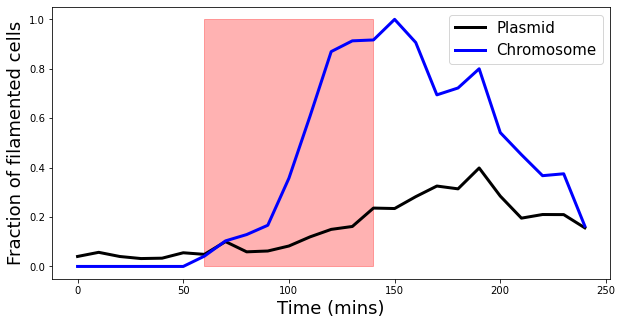

In [61]:



pBGT_fractions=[]
MG_fractions=[]
for frameMG,framepBGT in zip(frames_listMG,frames_listpBGT):
    this_frame_lengths_pBGT=list(df_lineagesC_pBGT[df_lineagesC_pBGT["frame"]==framepBGT]["length"])
    total_pBGT=len(this_frame_lengths_pBGT)
    filamented_pBGT=[x for x in this_frame_lengths_pBGT if x>pBGT_mean*2]
    fraction_pBGT=len(filamented_pBGT)/total_pBGT
    pBGT_fractions.append(fraction_pBGT)
    this_frame_lengths_MG=list(df_lineagesC_MG[df_lineagesC_MG["frame"]==frameMG]["length"])
    total_MG=len(this_frame_lengths_MG)
    filamented_MG=[x for x in this_frame_lengths_MG if x>MGGT_mean*2]
    fraction_MG=len(filamented_MG)/total_MG
    MG_fractions.append(fraction_MG)

plt.figure(figsize=(10,5))    
plt.plot(timespBGT,pBGT_fractions,lw=3,c='k',label="Plasmid")
plt.plot(timesMG,MG_fractions,lw=3,c='b',label="Chromosome")
#plt.vlines(x=frame_signal_startpBGT-frame_experiment_startpBGT,ymin=0,ymax=1,color='r')
plt.fill_between(x=[(frame_signal_startpBGT-frame_experiment_startpBGT)*frame2min,(frame_signal_endpBGT-frame_experiment_startpBGT)*frame2min],y1=1,color='r',alpha=.3)
plt.legend(fontsize=15)
plt.xlabel("Time (mins)",fontsize=18)
plt.ylabel("Fraction of filamented cells",fontsize=18)
plt.show()

## Time to SOS

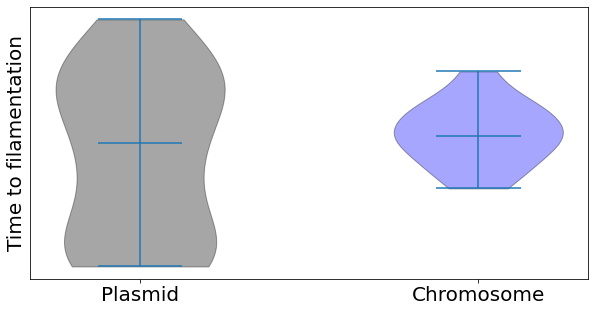

In [99]:
pBGT_lineages=df_lineagesC_pBGT.lineageID.unique()
pBGT_times_to_SOS={}
for this_lineage in pBGT_lineages:
    lineage_df=df_lineagesC_pBGT[df_lineagesC_pBGT["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endpBGT)&(lineage_frames[-1]>frame_signal_endpBGT)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame.unique())
            #track_frames.sort()
            if((track_frames[0]<frame_norm_endpBGT)&(track_frames[-1]>frame_signal_endpBGT-3)):
                this_lengths=list(track_df.length)
                elongation_indexs=[i for i,x in enumerate(this_lengths) if x>pBGT_mean*2]
                if(len(elongation_indexs)>0):
                    elongation_index=elongation_indexs[0]
                    this_time=track_frames[elongation_index]
                    pBGT_times_to_SOS[this_track]=this_time,this_lengths[elongation_index]
                
    
MGGT_lineages=df_lineagesC_MG.lineageID.unique()
MGGT_times_to_SOS={}
for this_lineage in MGGT_lineages:
    lineage_df=df_lineagesC_MG[df_lineagesC_MG["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endMG)&(lineage_frames[-1]>frame_signal_endMG)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame.unique())
            #track_frames.sort()
            if((track_frames[0]<frame_norm_endMG)&(track_frames[-1]>frame_signal_endMG-3)):
                this_lengths=list(track_df.length)
                elongation_indexs=[i for i,x in enumerate(this_lengths) if x>MGGT_mean*2]
                if(len(elongation_indexs)>0):
                    elongation_index=elongation_indexs[0]
                    this_time=track_frames[elongation_index]
                    MGGT_times_to_SOS[this_track]=this_time,this_lengths[elongation_index]
pBGT_times_to_SOS,MGGT_times_to_SOS

fig,ax=plt.subplots(figsize=(10,5))

plasmid=[v[0]-frame_signal_startpBGT for k,v in pBGT_times_to_SOS.items() ]
chromosome=[v[0]-frame_signal_startMG for k,v in MGGT_times_to_SOS.items()]
parts=ax.violinplot([plasmid,chromosome], showmedians=True)
colors=['k','b']
for i,pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.35)
ax.set_xticks([1,2])
ax.set_xticklabels(["Plasmid","Chromosome"],fontsize=20)
ax.set_ylabel("Time to filamentation",fontsize=20)
ax.set_yticks([])
ax.set_yticklabels([])
plt.show()



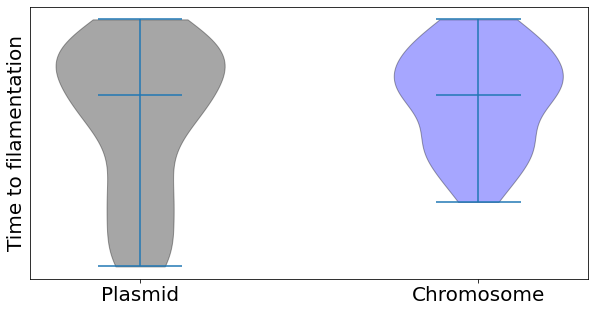

In [101]:
pBGT_lineages=df_lineagesC_pBGT.lineageID.unique()
pBGT_times_to_SOS={}
for this_lineage in pBGT_lineages:
    lineage_df=df_lineagesC_pBGT[df_lineagesC_pBGT["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endpBGT)&(lineage_frames[-1]>frame_signal_endpBGT)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame.unique())
            this_lengths=list(track_df.length)
            elongation_indexs=[i for i,x in enumerate(this_lengths) if x>pBGT_mean*2]
            if(len(elongation_indexs)>0):
                elongation_index=elongation_indexs[0]
                this_time=track_frames[elongation_index]
                pBGT_times_to_SOS[this_track]=this_time,this_lengths[elongation_index]

    
MGGT_lineages=df_lineagesC_MG.lineageID.unique()
MGGT_times_to_SOS={}
for this_lineage in MGGT_lineages:
    lineage_df=df_lineagesC_MG[df_lineagesC_MG["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endMG)&(lineage_frames[-1]>frame_signal_endMG)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame.unique())
            #track_frames.sort()
            this_lengths=list(track_df.length)
            elongation_indexs=[i for i,x in enumerate(this_lengths) if x>MGGT_mean*2]
            if(len(elongation_indexs)>0):
                elongation_index=elongation_indexs[0]
                this_time=track_frames[elongation_index]
                MGGT_times_to_SOS[this_track]=this_time,this_lengths[elongation_index]
pBGT_times_to_SOS,MGGT_times_to_SOS

fig,ax=plt.subplots(figsize=(10,5))

plasmid=[v[0]-frame_signal_startpBGT for k,v in pBGT_times_to_SOS.items() ]
chromosome=[v[0]-frame_signal_startMG for k,v in MGGT_times_to_SOS.items()]
parts=ax.violinplot([plasmid,chromosome], showmedians=True)
colors=['k','b']
for i,pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.35)
ax.set_xticks([1,2])
ax.set_xticklabels(["Plasmid","Chromosome"],fontsize=20)
ax.set_ylabel("Time to filamentation",fontsize=20)
ax.set_yticks([])
ax.set_yticklabels([])
plt.show()



## GFP distributions surviving vs nope

333.62503749191984
119.21304938271605


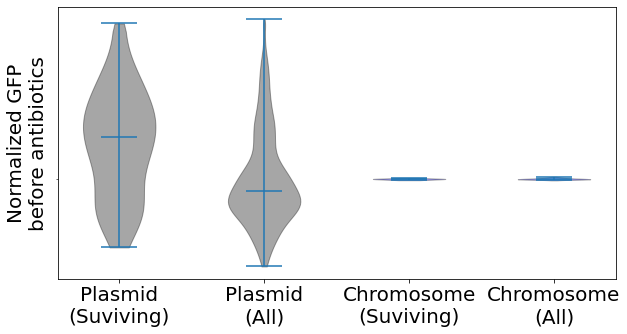

In [135]:
pBGT_lineages=df_lineagesC_pBGT.lineageID.unique()
pBGT_GFP_bfore_signal={}
GFP_pBGT=df_lineagesC_pBGT[df_lineagesC_pBGT["frame"]<frame_norm_endpBGT].GFP
meanGFP_pBGT=GFP_pBGT.mean()
print(meanGFP_pBGT)
for this_lineage in pBGT_lineages:
    lineage_df=df_lineagesC_pBGT[df_lineagesC_pBGT["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endpBGT-1)&(lineage_frames[-1]>frame_signal_endpBGT)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame.unique())
            #track_frames.sort()
            if((track_frames[0]<frame_norm_endpBGT)&(track_frames[-1]>frame_signal_endpBGT)):
                before_signal_track_df=track_df[track_df["frame"]==frame_norm_endpBGT]
                pBGT_GFP_bfore_signal[this_track]=before_signal_track_df["GFP"].item()

    
MGGT_lineages=df_lineagesC_MG.lineageID.unique()
MGGT_GFP_bfore_signal={}
GFP_MGGT=df_lineagesC_MG[df_lineagesC_MG["frame"]<frame_norm_endMG].GFP
meanGFP_MGGT=GFP_MGGT.mean()
print(meanGFP_MGGT)

for this_lineage in MGGT_lineages:
    lineage_df=df_lineagesC_MG[df_lineagesC_MG["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endMG)&(lineage_frames[-1]>frame_signal_endMG)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame.unique())
            #track_frames.sort()
            if((track_frames[0]<=frame_norm_endMG)&(track_frames[-1]>frame_signal_endMG)):
                before_signal_track_df=track_df[track_df["frame"]==frame_norm_endMG]
                MGGT_GFP_bfore_signal[this_track]=before_signal_track_df["GFP"].item()



fig,ax=plt.subplots(figsize=(10,5))

plasmid=[v/meanGFP_pBGT for k,v in pBGT_GFP_bfore_signal.items() ]
plasmid0=[x/meanGFP_pBGT for x in GFP_pBGT]
chromosome=[v/meanGFP_MGGT for k,v in MGGT_GFP_bfore_signal.items()]
chromosome0=[v/meanGFP_MGGT for v in GFP_MGGT]
#parts=ax.violinplot([plasmid,chromosome], showmedians=True)
parts=ax.violinplot([plasmid,plasmid0,chromosome,chromosome0], showmedians=True)
colors=['k','b']
colors=['k','k','b','b']
for i,pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.35)
ax.set_yscale("symlog")
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["Plasmid\n(Surviving)","Plasmid\n(All)","Chromosome\n(Surviving)","Chromosome\n(All)"],fontsize=20)
ax.set_ylabel("Normalized GFP\nbefore antibiotics",fontsize=20)
ax.set_yticks([])
ax.set_yticklabels([])
plt.show()



## Time-series length

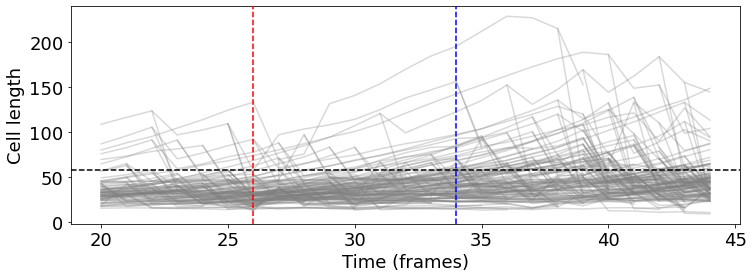

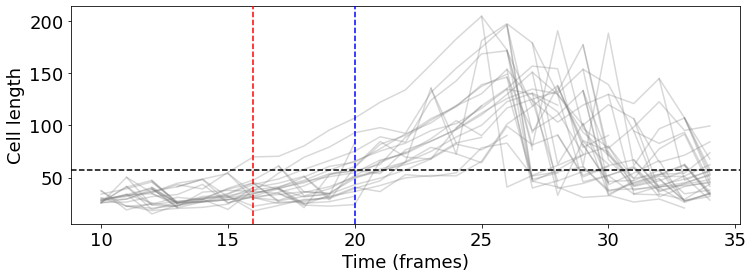

In [156]:

length_threshold=250


mpl.rcParams.update({'font.size': 18})

fig=plt.figure(figsize=(12,4))
ax = plt.axes()

ax.axvline(x=frame_signal_startpBGT,color='r',linestyle='dashed',zorder=3)
ax.axvline(x=frame_signal_endpBGT,color='b',linestyle='dashed',zorder=3)
ax.axhline(y=2*pBGT_mean,color='k',linestyle='dashed',zorder=3,label="elongation threshold")
pBGT_lineages=df_lineagesC_pBGT.lineageID.unique()
for this_lineage in pBGT_lineages:
    lineage_df=df_lineagesC_pBGT[df_lineagesC_pBGT["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endpBGT-1)&(lineage_frames[-1]>frame_signal_endpBGT)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame)
            track_lengths=list(track_df.length)
            #tcolor=list(track_df["cellColor"])[0]
            ax.plot(track_frames,track_lengths,c='gray',alpha=.3)

ax.set_ylabel("Cell length")
ax.set_xlabel("Time (frames)")



fig=plt.figure(figsize=(12,4))
ax = plt.axes()

ax.axvline(x=frame_signal_startMG,color='r',linestyle='dashed',zorder=3)
ax.axvline(x=frame_signal_endMG,color='b',linestyle='dashed',zorder=3)
ax.axhline(y=2*MGGT_mean,color='k',linestyle='dashed',zorder=3,label="elongation threshold")
MGGT_lineages=df_lineagesC_MG.lineageID.unique()
for this_lineage in MGGT_lineages:
    lineage_df=df_lineagesC_MG[df_lineagesC_MG["lineageID"]==this_lineage]
    lineage_frames=list(lineage_df.frame.unique())
    lineage_frames.sort()
    if((lineage_frames[0]<frame_norm_endMG-1)&(lineage_frames[-1]>frame_signal_endMG)):
        tracks=list(lineage_df.trackID.unique())
        for this_track in tracks:
            track_df=lineage_df[lineage_df["trackID"]==this_track]
            track_frames=list(track_df.frame)
            track_lengths=list(track_df.length)
            #tcolor=list(track_df["cellColor"])[0]
            ax.plot(track_frames,track_lengths,c='gray',alpha=.3)

ax.set_ylabel("Cell length")
ax.set_xlabel("Time (frames)")
plt.show()